# Sentiment Analysis Using Recurrent Neural Networks

## RNN- SimpleRNN

In [1]:
import tensorflow as tf
print("TensorFlow version: " + tf.__version__)

TensorFlow version: 2.0.0


In [2]:
import keras
print("Keras version: " + keras.__version__)

Using TensorFlow backend.


Keras version: 2.3.0


### Processing the labels of the raw movie data

In [3]:
import os

movies_dir = '/Users/jrmth/Desktop/Notebooks/Sentiment Analysis/aclImdb/'
movies_train_dir = os.path.join(movies_dir, 'train')

movie_labels = []
movie_texts = []

for label_type in ['neg', 'pos']:
    movie_dir_name = os.path.join(movies_train_dir, label_type)
    for fname in os.listdir(movie_dir_name):
        if fname[-4:] == '.txt':
            file = os.path.join(movie_dir_name, fname)
            movie_file = open(file, encoding="utf8")
            movie_texts.append(movie_file.read())
            movie_file.close()
            if label_type == 'neg':
                movie_labels.append(0)
            else:
                movie_labels.append(1)

### Tokenizing the text of the raw movie data

In [4]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# We'll cut reviews after 200 words
maxlen = 200

# We'll be training on 12500 samples
movie_training_samples = 125000

# We'll be validating on 15000 samples
movie_validation_samples = 15000

# We'll only consider the top 15000 words in the dataset
max_words = 15000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(movie_texts)
sequences = tokenizer.texts_to_sequences(movie_texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

movie_data = pad_sequences(sequences, maxlen=maxlen)

movie_labels = np.asarray(movie_labels)
print('Tensor shape for data:', movie_data.shape)
print('Tensor shape for label:', movie_labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(movie_data.shape[0])
np.random.shuffle(indices)
movie_data = movie_data[indices]
movie_labels = movie_labels[indices]

movie_data_train = movie_data[:movie_training_samples]

movie_labels_train = movie_labels[:movie_training_samples]

movie_data_val = movie_data[movie_training_samples: movie_training_samples + 
                            movie_validation_samples]
movie_labels_val = movie_labels[movie_training_samples: movie_training_samples + 
                                movie_validation_samples]

Found 88582 unique tokens.
Tensor shape for data: (25000, 200)
Tensor shape for label: (25000,)


### A first recurrent layer - SimpleRNN

In [5]:
from keras.layers import SimpleRNN

In [6]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

simple_rnn_model = Sequential()
simple_rnn_model.add(Embedding(20000, 32))
simple_rnn_model.add(SimpleRNN(32))
simple_rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          640000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 642,080
Trainable params: 642,080
Non-trainable params: 0
_________________________________________________________________


In [7]:
simple_rnn_model = Sequential()
simple_rnn_model.add(Embedding(20000, 32))
simple_rnn_model.add(SimpleRNN(32, return_sequences=True))
simple_rnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          640000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 642,080
Trainable params: 642,080
Non-trainable params: 0
_________________________________________________________________


In [8]:
simple_rnn_model = Sequential()
simple_rnn_model.add(Embedding(20000, 32))
simple_rnn_model.add(SimpleRNN(32, return_sequences=True))
simple_rnn_model.add(SimpleRNN(32, return_sequences=True))
simple_rnn_model.add(SimpleRNN(32, return_sequences=True))
simple_rnn_model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
simple_rnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          640000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 648,320
Trainable params: 648,320
Non-trainable params: 0
_________________________________________________________________


In [9]:
from keras.layers import Dense

simple_rnn_model = Sequential()
simple_rnn_model.add(Embedding(max_words, 32))
simple_rnn_model.add(SimpleRNN(32))
simple_rnn_model.add(Dense(1, activation='sigmoid'))

simple_rnn_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = simple_rnn_model.fit(movie_data_train, movie_labels_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)
simple_rnn_model.save_weights('simple_rnn_model.h5')

C:\Users\jrmth\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 19s 950us/step - loss: 0.6151 - acc: 0.6472 - val_loss: 0.4821 - val_acc: 0.7734
Epoch 2/10
20000/20000 [==============================] - 20s 980us/step - loss: 0.3845 - acc: 0.8388 - val_loss: 0.4630 - val_acc: 0.8070
Epoch 3/10
20000/20000 [==============================] - 17s 842us/step - loss: 0.2825 - acc: 0.8892 - val_loss: 0.3698 - val_acc: 0.8430
Epoch 4/10
20000/20000 [==============================] - 16s 811us/step - loss: 0.2010 - acc: 0.9255 - val_loss: 0.5729 - val_acc: 0.7318
Epoch 5/10
20000/20000 [==============================] - 17s 846us/step - loss: 0.1409 - acc: 0.9508 - val_loss: 0.5020 - val_acc: 0.8396
Epoch 6/10
20000/20000 [==============================] - 15s 767us/step - loss: 0.0876 - acc: 0.9714 - val_loss: 0.4594 - val_acc: 0.8584
Epoch 7/10
20000/20000 [==============================] - 17s 868us/step - loss: 0.0538 - acc: 0.9826 - val_loss: 0.5

In [10]:
%matplotlib inline

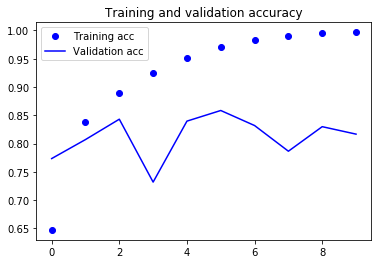

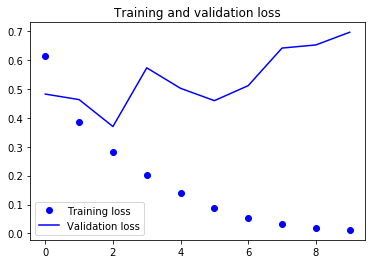

In [11]:
import matplotlib.pyplot as plt

accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']
loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, validation_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Using Long-short memory (LSTM)

In [12]:
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(Embedding(max_words, 32))
lstm_model.add(LSTM(32))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = lstm_model.fit(movie_data_train, movie_labels_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)
lstm_model.save_weights('lstm_model.h5')

C:\Users\jrmth\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.4768 - acc: 0.7731 - val_loss: 0.3824 - val_acc: 0.8334
Epoch 2/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.2674 - acc: 0.8959 - val_loss: 0.2779 - val_acc: 0.8938
Epoch 3/10
20000/20000 [==============================] - 38s 2ms/step - loss: 0.2020 - acc: 0.9260 - val_loss: 0.3781 - val_acc: 0.8396
Epoch 4/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.1724 - acc: 0.9370 - val_loss: 0.3215 - val_acc: 0.8628
Epoch 5/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.1451 - acc: 0.9474 - val_loss: 0.3322 - val_acc: 0.8762
Epoch 6/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.1220 - acc: 0.9572 - val_loss: 0.5147 - val_acc: 0.8602
Epoch 7/10
20000/20000 [==============================] - 40s 2ms/step - loss: 0.1077 - acc: 0.9629 - val_loss: 0.4212 - val_acc:

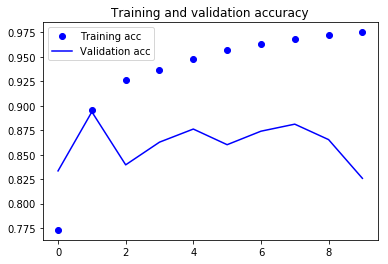

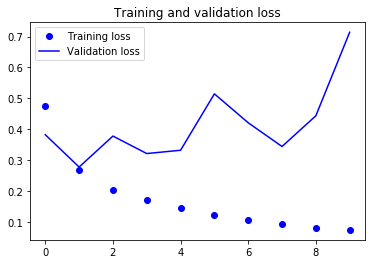

In [13]:
accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']
loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, validation_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Reversed-order LSTM

In [14]:
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

# Reverse sequences
movie_data_train = [x[::-1] for x in movie_data_train]
movie_data_val = [x[::-1] for x in movie_data_val]

# Pad sequences
movie_data_train = sequence.pad_sequences(movie_data_train, maxlen=maxlen)
movie_data_val = sequence.pad_sequences(movie_data_val, maxlen=maxlen)

reverse_order_lstm_model = Sequential()
reverse_order_lstm_model.add(layers.Embedding(max_words, 128))
reverse_order_lstm_model.add(layers.LSTM(32))
reverse_order_lstm_model.add(layers.Dense(1, activation='sigmoid'))

reverse_order_lstm_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = reverse_order_lstm_model.fit(movie_data_train, movie_labels_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)
reverse_order_lstm_model.save_weights('reverse_order_lstm_model.h5')

C:\Users\jrmth\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 53s 3ms/step - loss: 0.6522 - acc: 0.6099 - val_loss: 0.6204 - val_acc: 0.6922
Epoch 2/10
20000/20000 [==============================] - 53s 3ms/step - loss: 0.5864 - acc: 0.7211 - val_loss: 0.5455 - val_acc: 0.7536
Epoch 3/10
20000/20000 [==============================] - 53s 3ms/step - loss: 0.4688 - acc: 0.8124 - val_loss: 0.5302 - val_acc: 0.8018
Epoch 4/10
20000/20000 [==============================] - 52s 3ms/step - loss: 0.3668 - acc: 0.8679 - val_loss: 0.4083 - val_acc: 0.8560
Epoch 5/10
20000/20000 [==============================] - 52s 3ms/step - loss: 0.3043 - acc: 0.8951 - val_loss: 0.3427 - val_acc: 0.8652
Epoch 6/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.2590 - acc: 0.9149 - val_loss: 0.5947 - val_acc: 0.7726
Epoch 7/10
20000/20000 [==============================] - 51s 3ms/step - loss: 0.2181 - acc: 0.9333 - val_loss: 0.3552 - val_acc:

### Bidirectional layer

In [15]:
from keras import backend as K
K.clear_session()

In [16]:
bidirectional_model = Sequential()
bidirectional_model.add(layers.Embedding(max_words, 32))
bidirectional_model.add(layers.Bidirectional(layers.LSTM(32)))
bidirectional_model.add(layers.Dense(1, activation='sigmoid'))

bidirectional_model.compile(optimizer='rmsprop', 
                            loss='binary_crossentropy', metrics=['acc'])
history = bidirectional_model.fit(movie_data_train, movie_labels_train,
                    epochs=10, batch_size=128, validation_split=0.2)

bidirectional_model.save_weights('bidirectional_model.h5')

C:\Users\jrmth\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.4992 - acc: 0.7696 - val_loss: 0.3997 - val_acc: 0.8498
Epoch 2/10
20000/20000 [==============================] - 62s 3ms/step - loss: 0.2882 - acc: 0.8896 - val_loss: 0.2932 - val_acc: 0.8812
Epoch 3/10
20000/20000 [==============================] - 63s 3ms/step - loss: 0.2175 - acc: 0.9183 - val_loss: 0.3812 - val_acc: 0.8672
Epoch 4/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.1808 - acc: 0.9359 - val_loss: 0.4338 - val_acc: 0.8518
Epoch 5/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.1553 - acc: 0.9449 - val_loss: 0.2902 - val_acc: 0.8852
Epoch 6/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.1302 - acc: 0.9545 - val_loss: 0.3997 - val_acc: 0.8732
Epoch 7/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.1134 - acc: 0.9617 - val_loss: 0.3265 - val_acc: